<a href="https://colab.research.google.com/github/TSobha/FDP_CV/blob/main/fune_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fine Tuning

In [1]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/FDP-CV')

In [3]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

2.9.2


In [4]:
# load numpy array from npy file
from numpy import load

X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')
     

In [5]:

print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (400, 299, 299, 3)
X_test_std_shape: (100, 299, 299, 3)


In [6]:
# Load the saved best model

model_FineTune = keras.models.load_model('/content/drive/MyDrive/Models/01_Xception_TransferLearning_Best_Model.h5')
     

In [7]:
model_FineTune.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

In [8]:
model_FineTune.layers

In [9]:
len(model_FineTune.layers)

134

In [10]:
# Fine-tune the model from index 60 onwards

for layer in model_FineTune.layers[:60]:
  layer.trainable = False

for layer in model_FineTune.layers[60:]:
  layer.trainable = True


In [11]:
model_FineTune.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])

callbacks_FineTune = [            
             keras.callbacks.ModelCheckpoint("bestFT.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model_FineTune.fit(x = X_train_std, y = y_train, epochs=50,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FineTune)
     

Epoch 1/50
23/23 [==============================] - 19s 340ms/step - loss: 0.0958 - accuracy: 0.9722 - val_loss: 1.1885 - val_accuracy: 0.6250
Epoch 2/50
23/23 [==============================] - 6s 274ms/step - loss: 0.0544 - accuracy: 0.9806 - val_loss: 0.6217 - val_accuracy: 0.8000
Epoch 3/50
23/23 [==============================] - 6s 275ms/step - loss: 0.1052 - accuracy: 0.9694 - val_loss: 1.5792 - val_accuracy: 0.9000
Epoch 4/50
23/23 [==============================] - 6s 255ms/step - loss: 0.1796 - accuracy: 0.9722 - val_loss: 1.2113 - val_accuracy: 0.8250
Epoch 5/50
23/23 [==============================] - 6s 260ms/step - loss: 0.0717 - accuracy: 0.9861 - val_loss: 1.6297 - val_accuracy: 0.7500
Epoch 6/50
23/23 [==============================] - 6s 259ms/step - loss: 0.0454 - accuracy: 0.9917 - val_loss: 0.4123 - val_accuracy: 0.8500
Epoch 7/50
23/23 [==============================] - 6s 261ms/step - loss: 0.0410 - accuracy: 0.9917 - val_loss: 0.2772 - val_accuracy: 0.8750
Epoch

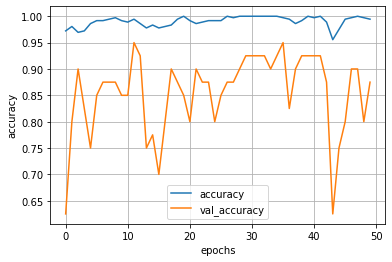

In [12]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [13]:
testLoss_FineTune, testAccuracy_FineTune = model_FineTune.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 [==============================] - 2s 295ms/step - loss: 0.7292 - accuracy: 0.8100
Test-loss: 0.729201, Test-accuracy: 0.810000


In [14]:
model_FineTune.load_weights("bestFT.h5")

testLoss_FineTune, testAccuracy_FineTune = model_FineTune.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 [==============================] - 1s 172ms/step - loss: 0.5235 - accuracy: 0.8300
Test-loss: 0.523491, Test-accuracy: 0.830000


In [15]:
cProba = model_FineTune.predict(X_test_std[:1])

print(cProba)

1/1 [==============================] - 1s 843ms/step
[[6.7212915e-09 3.6387526e-08 1.0000000e+00 1.1684360e-08 2.4180835e-10]]


In [16]:
cLabel = np.argmax(cProba, axis=-1) 

print(cLabel)

[2]


In [17]:
print(y_test[:1])

[2]


In [18]:
# Saves the best model obtained
model_FineTune.save('/content/drive/MyDrive/Models/02_Xception_FineTuned_Best_Model.h5')
     